# More on least squares

In the last section, we derived and implemented the solution to the least squares problem

$$
\min_{\boldsymbol{\beta}} \|\boldsymbol{y}-\boldsymbol{X\beta}\|_2^2 \hspace{10mm} (1)
$$

which we found (with some calculus) to be satisfied by any vector $\boldsymbol{\beta}$ satisfying the _normal equations_:

$$
\boldsymbol{X^\top X\beta} = \boldsymbol{X^\top y}. \hspace{10mm} (2)
$$

In this section, we investigate the properties of this solution a bit more, emphasizing the linear algebraic properties of this problem and its solution(s).

## The linear algebra of the least squares solution

In the simplest case, when the data matrix $\boldsymbol{X^\top X}$ is invertible, the least squares problem $(1)$ has a unique solution, obtained by multiplying either side of $(2)$ by $(\boldsymbol{X^\top X})^{-1}$:

$$
\hat{\boldsymbol{\beta}} = (\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}.
$$

In this case, we can easily find the fitted values $\hat{\boldsymbol{y}}$ by simply multiplying $\hat{\boldsymbol{\beta}}$ on the left by $\boldsymbol{X}$. This gives

$$
\hat{\boldsymbol{y}} = \boldsymbol{X}\hat{\boldsymbol{\beta}} = \boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}.
$$

In the context of linear regression, the matrix $\boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top}$ is sometimes called the "hat matrix", since it "puts the hat on" the vector $\boldsymbol{y}$. However, this matrix is also of more general interest in linear algebra: it is a special matrix which performs a very particular opertation. The matrix $\boldsymbol{P} = \boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top}$ is called the projection onto the _column space_ of $\boldsymbol{X}$. To understand what this means, we must first define what we mean by the column space.

Given a set of vectors $\boldsymbol{v}_1,\dots, \boldsymbol{v}_p$, the _span_ of $\boldsymbol{v}_1,\dots, \boldsymbol{v}_p$ is the vector space given by all linear combinations of these vectors:

  $$
\text{span}(\boldsymbol{v}_1,\dots,\boldsymbol{v}_p) = \left\{\boldsymbol{x} : \boldsymbol{x} = \sum_{j=1}^p \alpha_j \boldsymbol{v}_j,\; \text{for some } \alpha_1,\dots,\alpha_p \in \mathbb{R}\right\}
  $$

Then given a matrix $\boldsymbol{X}$ with column $\boldsymbol{x}_1,\dots, \boldsymbol{x}_p$, the column space of $\boldsymbol{X}$, denoted $\text{col}(\boldsymbol{X})$ is simply the $\boldsymbol{x}_1,\dots, \boldsymbol{x}_p$. The _projection_ onto the column space $\boldsymbol{X}$ is the matrix $\boldsymbol{P}$ which, when applied to a vector $\boldsymbol{y}$, returns the nearest vector in $\text{col}(\boldsymbol{X})$.

In 2-d, there is a simple picture which illustrates this concept. Imagine a single vector, say, $\boldsymbol{x} = \begin{bmatrix}1\\ 1\end{bmatrix}$, which we think of as a matrix with a single column. Then the column space of $\boldsymbol{x}$ is simply the set of all vectors of the form $\alpha \begin{bmatrix}1\\ 1\end{bmatrix} = \begin{bmatrix}\alpha \\ \alpha \end{bmatrix}$ for $\alpha \in \mathbb{R}$. Visually, this corresponds to a line through the origin with slope 1, i.e. the $y=x$ line. Let's visualize this in python.

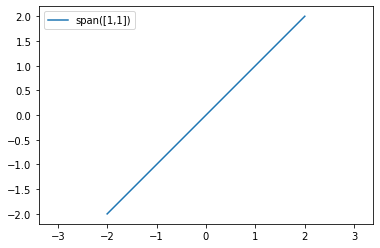

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-2,2,10)

plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.axis("equal")
plt.show()

Now let's consider another vector in $\mathbb{R}^2$, say $\boldsymbol{u}= \begin{bmatrix}-1\\ 1\end{bmatrix}$, which we can add to this plot as a point.

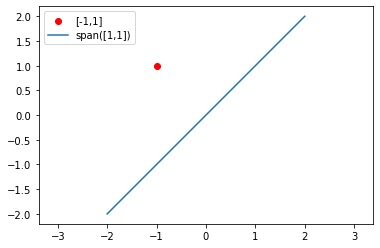

In [2]:
plt.scatter([-1], [1], color='red', label='[-1,1]')
plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.axis("equal")
plt.show()

The (orthogonal) projection of $\boldsymbol{u}$ onto $\text{span}(\boldsymbol{x})$ is defined to be the nearest $\boldsymbol{u}' \in \text{span}(\boldsymbol{x})$ to $\boldsymbol{u}$. Formally,

$$
\min_{\boldsymbol{u}' \in \text{span}(\boldsymbol{x})} \|\boldsymbol{u} - \boldsymbol{u}'\|_2^2 = \min_{\alpha \in \mathbb{R}} \|\boldsymbol{u} - \alpha \boldsymbol{x}\|_2^2.
$$

This now looks just like a toy version of our least squares problem! The solution is given by

$$
\hat{\boldsymbol{u}}' = \frac{\boldsymbol{xx}^\top}{\boldsymbol{x^\top x}}\boldsymbol{u}
$$

which corresponds to

$$
\hat{\alpha} = \frac{\boldsymbol{x^\top u}}{\boldsymbol{x^\top x}}.
$$

In our example, $\boldsymbol{x} = \begin{bmatrix}1\\ 1\end{bmatrix}$ and $\boldsymbol{u} = \begin{bmatrix}-1\\ 1\end{bmatrix}$, so

$$
\hat{\alpha} = 0
$$

and therefore the projection of $\boldsymbol{u}$ onto $\text{span}(\boldsymbol{x})$ is given by

$$
\hat{\boldsymbol{u}}' = \hat{\alpha}\boldsymbol{x} = \begin{bmatrix}0\\ 0\end{bmatrix}
$$

Let's visualize this on our plot.

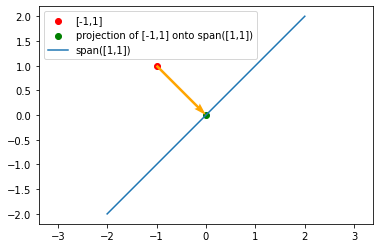

In [3]:
plt.scatter([-1], [1], color='red', label='[-1,1]')
plt.scatter([0], [0], color='green', label='projection of [-1,1] onto span([1,1])')

# this line just plots an arrow to illustrate the action that is happening to
# [-1,1] when it is projected onto span([1,1])
plt.quiver(*[-1,1], *[1,-1], scale=1, units='xy', color='orange')

plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.axis("equal")
plt.show()

In the context of the least squares problem this means the following: the fitted values $\hat{\boldsymbol{y}}$ are the _projection_ of the response vector $\boldsymbol{y}$ onto the span of the columns of $\boldsymbol{X}$. This fact is important not only for mathematical intuition, but because it can help us design methods for solving least squares problems in practice. We discuss one such method next.

## Solving the least squares problem using the QR decomposition

The largest computational burden in performing least squares comes from computing the inverse of the matrix $\boldsymbol{X^\top X}$. In particular when the number of features $p$ is large, this can be expensive, numerically unstable or not otherwise not feasible. In these situations, we would like to have algorithms to find $\hat{\boldsymbol{\beta}}$ (or perhaps at least the fitted values $\hat{\boldsymbol{y})}$ without having to explicitly compute $(\boldsymbol{X^\top X})^{-1}$.

In this section, we show that the _QR decomposition_ can be used to find both $\hat{\boldsymbol{\beta}}$ and $\hat{\boldsymbol{y}}$ without ever having to explicitly compute the matrix $(\boldsymbol{X^\top X})^{-1}$. The QR decomposition of an $n\times p$ matrix $\boldsymbol{X}$ is a decomposition of $\boldsymbol{X}$ into two matrices $\boldsymbol{Q}, \boldsymbol{R}$ such that $\boldsymbol{X} = \boldsymbol{QR}$ and $\boldsymbol{R}$ is an upper triangular matrix, and $\boldsymbol{Q}$ is an _orthogonal_ matrix such that $\boldsymbol{Q^\top Q} = \boldsymbol{I}$ (the identity matrix.)

Let's look at a toy example in python with the matrix

$$
\boldsymbol{X} = \begin{bmatrix} 1 & 2\\ -1 & 0\\ 1 & 1\end{bmatrix}
$$

First, we define this as a numpy array.

In [4]:
X = np.array([[1, 2],
              [-1, 0],
              [1, 1]])
print(X)

[[ 1  2]
 [-1  0]
 [ 1  1]]


Now we can compute the QR decomposition using the function `np.linalg.qr`:

In [5]:
Q, R = np.linalg.qr(X)

This returns two matrices: the first, $\boldsymbol{Q}$ is orthogonal, which we can check by calculating $\boldsymbol{Q^\top Q}$:

In [6]:
print(np.dot(Q.T, Q).round(4))

[[1. 0.]
 [0. 1.]]


As expected, this gives us the identity matrix. The matrix $\boldsymbol{R}$ is upper triangular, meaning that $\boldsymbol{R}_{ij} = 0$ for $j<i$. We can also print this:

In [7]:
print(R)

[[-1.73205081 -1.73205081]
 [ 0.         -1.41421356]]


Let's see how we can use the QR decomposition to find both the fitted values $\hat{\boldsymbol{y}}$ as well as the actual coefficients $\hat{\boldsymbol{\beta}}$, without ever having to call `np.linalg.inv`.

To illustrate these ideas, we will use the same California housing dataset that we used in the previous section.

In [8]:
import pandas as pd

# load in the dataset
dataset = pd.read_csv("datasets/california_housing.csv")

# extract the features and the response
X = dataset[[c for c in dataset.columns if c!="MedHouseVal"]].to_numpy()
y = dataset["MedHouseVal"].to_numpy()

# create a (n, 1) array of all ones
ones = np.ones(X.shape[0]).reshape(-1,1)

# add this array as a new column of X
X = np.hstack([ones, X])

**Finding $\hat{\boldsymbol{y}}$.** Let's start with finding $\hat{\boldsymbol{y}}$. Recall that this is given by

$$
\hat{\boldsymbol{y}} = \boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}.
$$

Let's start by plugging in $\boldsymbol{X} = \boldsymbol{QR}$:

$$
\begin{align*}
\hat{\boldsymbol{y}} &= \boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}\\
&= \boldsymbol{QR}(\boldsymbol{(QR)^\top QR})^{-1}\boldsymbol{(QR)^\top y}\\
&= \boldsymbol{QR}(\boldsymbol{R^\top \underbrace{Q^\top Q}_{=\boldsymbol{I}}R})^{-1}\boldsymbol{R^\top\boldsymbol{Q}^\top y}\\
&= \boldsymbol{Q}\underbrace{\boldsymbol{RR}^{-1}}_{=\boldsymbol{I}}\underbrace{(\boldsymbol{R^\top})^{-1}\boldsymbol{R}^\top}_{=\boldsymbol{I}}\boldsymbol{Q}^\top \boldsymbol{y}\\
&= \boldsymbol{QQ}^\top \boldsymbol{y}.
\end{align*}
$$

Thus we see that we can find the fitted values can be computed just using the $\boldsymbol{Q}$ matrix from the QR decomposition! In fact, the expression $\boldsymbol{QQ^\top}$ is just another way of representing the "hat" matrix $\boldsymbol{X}(\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top}$. This is convenient, because (as promised) we can compute $\hat{\boldsymbol{y}}$ without having to explicitly invert $\boldsymbol{X^\top X}$. Let's do this for our housing dataset. (We won't actually print out the full `y_hat` array, as this would be very large.)

In [9]:
Q, R = np.linalg.qr(X)
QQT = np.dot(Q, Q.T)
y_hat = np.dot(QQT, y)
print(y_hat.shape)

(20640,)


**Finding $\hat{\boldsymbol{\beta}}$ using QR and backsubstitution.** Next, we show that the QR decomposition can be used with another algorithm, called backsubstitution, to explicitly find the coefficients $\hat{\boldsymbol{\beta}}$ without ever having to invert $\boldsymbol{X^\top X}$. To do this, recall that $\hat{\boldsymbol{\beta}}$ is the vector $\boldsymbol{\beta}$ which satisfies the normal equations:

$$
\boldsymbol{X^\top X\beta} = \boldsymbol{X^\top y}.
$$

If we again plug in the QR decomposition of $\boldsymbol{X}$ into this equation and simplify, it's possible to show that the normal equations can be equivalently expressed as

$$
\boldsymbol{R\beta} = \boldsymbol{Q^\top y}. \hspace{10mm} (3)
$$

While this looks like we haven't done too much to help -- just replaced the names of the matrices in the equations -- what is important is that the matrix $\boldsymbol{R}$ is now upper triangular. This makes solving equations like $(3)$ considerably easier using an intuitive algorithm called backsubstitution. To see how backsubstitution works, let's first recognize that $(3)$ defines a system of equations that might look something like the following:

$$
\begin{align*}
x_1 - x_2 + 2x_3 &= 2\\
3x_2 - x_3 &= 1\\
2x_3 &= 2
\end{align*}
$$

This system is "triangular", since each equation contains fewer terms than the previous equations. Intuitively, the best way to solve this is by starting at the last equation to easily get $x_3 = 1$, plugging this into the second equation to get $x_2 = 2/3$, and then plugging both of these into the first equation to get $x_1 = 2/3$. This algorithm can in fact be formalized into an algorithm which is simple to implement on a computer called _backsubstitution_.

We won't discuss details of how the algorithm is implemented here, but it can be easily accessed in python using the function `scipy.linalg.solve_triangular(R, v)` in the python package `scipy`. This function takes in a triangular matrix $\boldsymbol{R}$ and a vector $\boldsymbol{v}$, and returns an array $\boldsymbol{u}$ satisfying $\boldsymbol{Ru} = \boldsymbol{v}$. In our case, $\boldsymbol{R}$ comes from the QR decomposition of $\boldsymbol{X}$, and $\boldsymbol{v} = \boldsymbol{Q^\top y}$. Let's use this to get the coefficients of the California housing model.

In [10]:
from scipy.linalg import solve_triangular

v = np.dot(Q.T, y)
beta_hat = solve_triangular(R, v)

# get all the names of the columns
feature_names = ["Intercept"] + [c for c in dataset.columns if c!="MedHouseVal"]

# print the coefficients
for name, coeff in zip(feature_names, beta_hat):
    print(f"{name}: {coeff}")

Intercept: -36.941920207184054
MedInc: 0.43669329313432714
HouseAge: 0.00943577803323834
AveRooms: -0.10732204139090604
AveBedrms: 0.6450656935198206
Population: -3.976389421212714e-06
AveOccup: -0.003786542654970943
Latitude: -0.4213143775271393
Longitude: -0.4345137546747741


Indeed, this method gives us the same solution as before!

## What happens when $\boldsymbol{X^\top X}$ is not invertible?

The QR method described above is an effective method for solving the least squares problem when the inverse of $\boldsymbol{X^\top X}$ technically exists, but is computationally difficult to compute. However, there are also examples of data matrices $\boldsymbol{X}$ for which the inverse doesn't exist at all. In these cases, even the QR-based methods will not work.

Let's understand how this situation can arise. Mathematically, the inverse of $\boldsymbol{X^\top X}$ will exist whenever the data matrix $\boldsymbol{X}$ is full column rank. Conversely, if $\boldsymbol{X^\top X}$ is not invertible, it means that $\boldsymbol{X}$ is not full rank, and in particular that the columns of $\boldsymbol{X}$ are _linearly dependent_, meaning that at least one of features can be written as a linear combination of some of the other features. When this occurs, it means that the normal equations

$$
\boldsymbol{X^\top X \beta} = \boldsymbol{X^\top y}
$$

actually have many valid solutions, and so we cannot uniquely determine the coefficients $\hat{\boldsymbol{\beta}}$. Later in this course, we will discuss a variety of techniques for handling this situation -- notably, the Ridge and LASSO approaches to regression, which resolve this problem by adding _regularization_. Here, we briefly discuss an alternative which is primarily motivated by linear algebra, and less commonly used in statistical applications (though it has been studied more recently). In the case when the normal equations have many solutions, one needs to use some heuristic to pick one of these. A reasonable option to is pick the $\boldsymbol{\beta}$ satisfying $(2)$ that has the smallest norm. Formally this problem becomes:

$$
\begin{align*}
\min_{\boldsymbol{\beta}}\;\; & \|\boldsymbol{\beta}\|_2\\
\text{such that}\;\;  & \boldsymbol{X^\top X\beta} = \boldsymbol{X^\top y}
\end{align*}
$$

It turns out the solution to this problem is given by $\hat{\boldsymbol{\beta}} = \boldsymbol{X}^\dagger y$ where $\boldsymbol{X}^\dagger$ is called the Moore-Penrose pseudo-inverse of $\boldsymbol{X}$. The pseudo-inverse can be defined and calculated using the singular value decomposition (you can find details [here](https://en.wikipedia.org/wiki/Moore–Penrose_inverse)), though for the sake of this notebook we will use an implementation included in the numpy function `np.linalg.pinv`.

Let's first construct a data matrix $\boldsymbol{X}$ for which $(\boldsymbol{X^\top X})^{-1}$ doesn't exist. A simple way to do this is to make a data matrix for which there are more features $p$ than number of observations $n$.

In [11]:
p = 50
n = 30

X = np.random.normal(size=(n,p))
beta_true = np.random.normal(size=p)
y = np.dot(X, beta_true) + 0.2*np.random.normal(size=n)

Next, let's verify that `np.linalg.inv` doesn't work when we try and invert $\boldsymbol{X^\top X}$.

In [12]:
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[-3.64341212e+12, -3.81586862e+13, -7.52955881e+13, ...,
        -5.01751510e+13,  9.79755727e+12, -3.13684242e+13],
       [-5.86637859e+13, -2.96664790e+13, -1.97259022e+12, ...,
         5.30268998e+13,  1.32138071e+14, -2.99402743e+13],
       [ 4.78566633e+12, -1.44694186e+13, -3.22615518e+13, ...,
         8.72728597e+12,  1.27494311e+13, -2.19633827e+13],
       ...,
       [ 2.99130483e+13,  2.25635147e+12,  3.12675116e+13, ...,
         4.59574396e+13,  7.80446082e+13, -3.03595051e+13],
       [-7.58822242e+12, -4.92054830e+12, -1.02316858e+14, ...,
         3.52955152e+13,  8.37974326e+13, -1.42713125e+13],
       [-9.97736172e+13,  5.84495737e+12, -1.09254994e+13, ...,
         6.71052383e+12, -1.87471513e+11, -1.06820510e+13]])

Notice that while the function doesn't actually give us an error, the numbers in $(\boldsymbol{X^\top X})^{-1}$ are extremely large (numerically effectively infinity), indicating that there is in fact probably something wrong. (This is a particularly insidious case, where we might naively apply a numpy function and get no error, even though something is going very wrong.)

We can verify that this isn't correct by checking that $\boldsymbol{X^\top X}(\boldsymbol{X^\top X})^{-1}$ isn't actually the identity matrix:

In [13]:
np.dot(XTX, XTX_inv)

array([[ 1.40625000e+00,  1.66015625e-01, -4.44335938e-01, ...,
        -4.29687500e-02, -2.89184570e-01, -4.68750000e-02],
       [ 1.75000000e+00,  1.32812500e+00, -5.00000000e-01, ...,
         6.87500000e-01, -4.62841797e+00,  3.90625000e-01],
       [ 1.12500000e+00,  7.77343750e-01,  1.12500000e+00, ...,
         8.67187500e-01, -4.79492188e-01, -4.68750000e-02],
       ...,
       [ 1.15625000e+00,  2.00195312e-01,  4.29687500e-01, ...,
         9.26757812e-01,  1.46484375e-03,  1.83593750e-01],
       [ 5.31250000e-01,  1.12304688e-01, -6.95312500e-01, ...,
         2.80273438e-01,  1.05657959e+00, -3.55468750e-01],
       [-2.00000000e+00, -2.18750000e-01,  3.75000000e-01, ...,
         2.81250000e-01,  7.76367188e-01,  5.00000000e-01]])

We can also check that using this inverse won't give us a correct solution to the normal equations.

In [14]:
beta_hat_bad = np.dot(XTX_inv, np.dot(X.T, y))

# check if (XTX beta_hat) == XTy
np.allclose(np.dot(XTX, beta_hat_bad), np.dot(X.T, y))

False

This returns false, because $\boldsymbol{X^\top X\beta} \neq \boldsymbol{X^\top y}$, verifying that this didn't actually give us a valid solution to the normal equations.

Instead, we can find a valid solution $\hat{\boldsymbol{\beta}}$ using the pseudo-inverse and the numpy function `np.linalg.pinv`:

In [15]:
X_pinv = np.linalg.pinv(X)
beta_hat_good = np.dot(X_pinv, y)

np.allclose(np.dot(XTX, beta_hat_good), np.dot(X.T, y))

True

This now works, meaning that the pseudo-inverse did give us a valid solution to the normal equations.